Dans la première étape, on va nettroyer les donnéess.
Nous utilisons d'abord USDM pour classer les régions arides
https://droughtmonitor.unl.edu/About/AbouttheData/DroughtClassification.aspx
c'est pour simplifier le problem, l'analyse de séries temporel multivariées est difficile, donc on va concentrer sur la série temporele avec une variable, c'est pourqoui qu'on utilise le DSCI pour represent le niveau de sécheresse.
Dans la question suivante, on va étudier la série temporele avec une variable. C'est-à-dire prévoir la valeur de DSCI.
Dans le graphe suivant, on peut regarder toutjours D0<D1<D2<D3<D4, donc on a certitude de considrer ici le D0 est valeur accumulée et DSCI = D0 + D1 + D2 + D3 + D4

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

data = pd.read_csv("D:\Programming\SY09_Project\données\drought.csv")
data = data.drop(columns=['0','-9'])
data['DATE'] = pd.to_datetime(data['DATE'],format='d_%Y%m%d')
data['state'] =pd.Categorical(data['state'])
data['DSCI'] = data.D0 + data.D1 + data.D2 + data.D3 + data.D4
data

,DATE,D0,D1,D2,D3,D4,W0,W1,W2,W3,W4,state,DSCI
0,1895-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alabama,0.0
1,1895-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alabama,0.0
2,1895-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alabama,0.0
3,1895-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alabama,0.0
4,1895-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alabama,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73339,2021-12-01,45.2,33.7,19.1,8.9,1.8,6.9,2.7,0.0,0.0,0.0,wyoming,108.7
73340,2022-01-01,38.8,27.8,11.2,5.7,2.2,11.5,4.3,0.3,0.0,0.0,wyoming,85.7
73341,2022-02-01,40.5,27.6,11.9,4.7,1.4,13.6,8.5,1.9,0.1,0.0,wyoming,86.1
73342,2022-03-01,28.5,15.4,4.4,1.7,0.0,22.3,12.3,3.9,0.8,0.0,wyoming,50.0


Le deuxième étape est de visualiser les données. Ici on va regarder le changement de l'état alabama de 1895 à 2022.

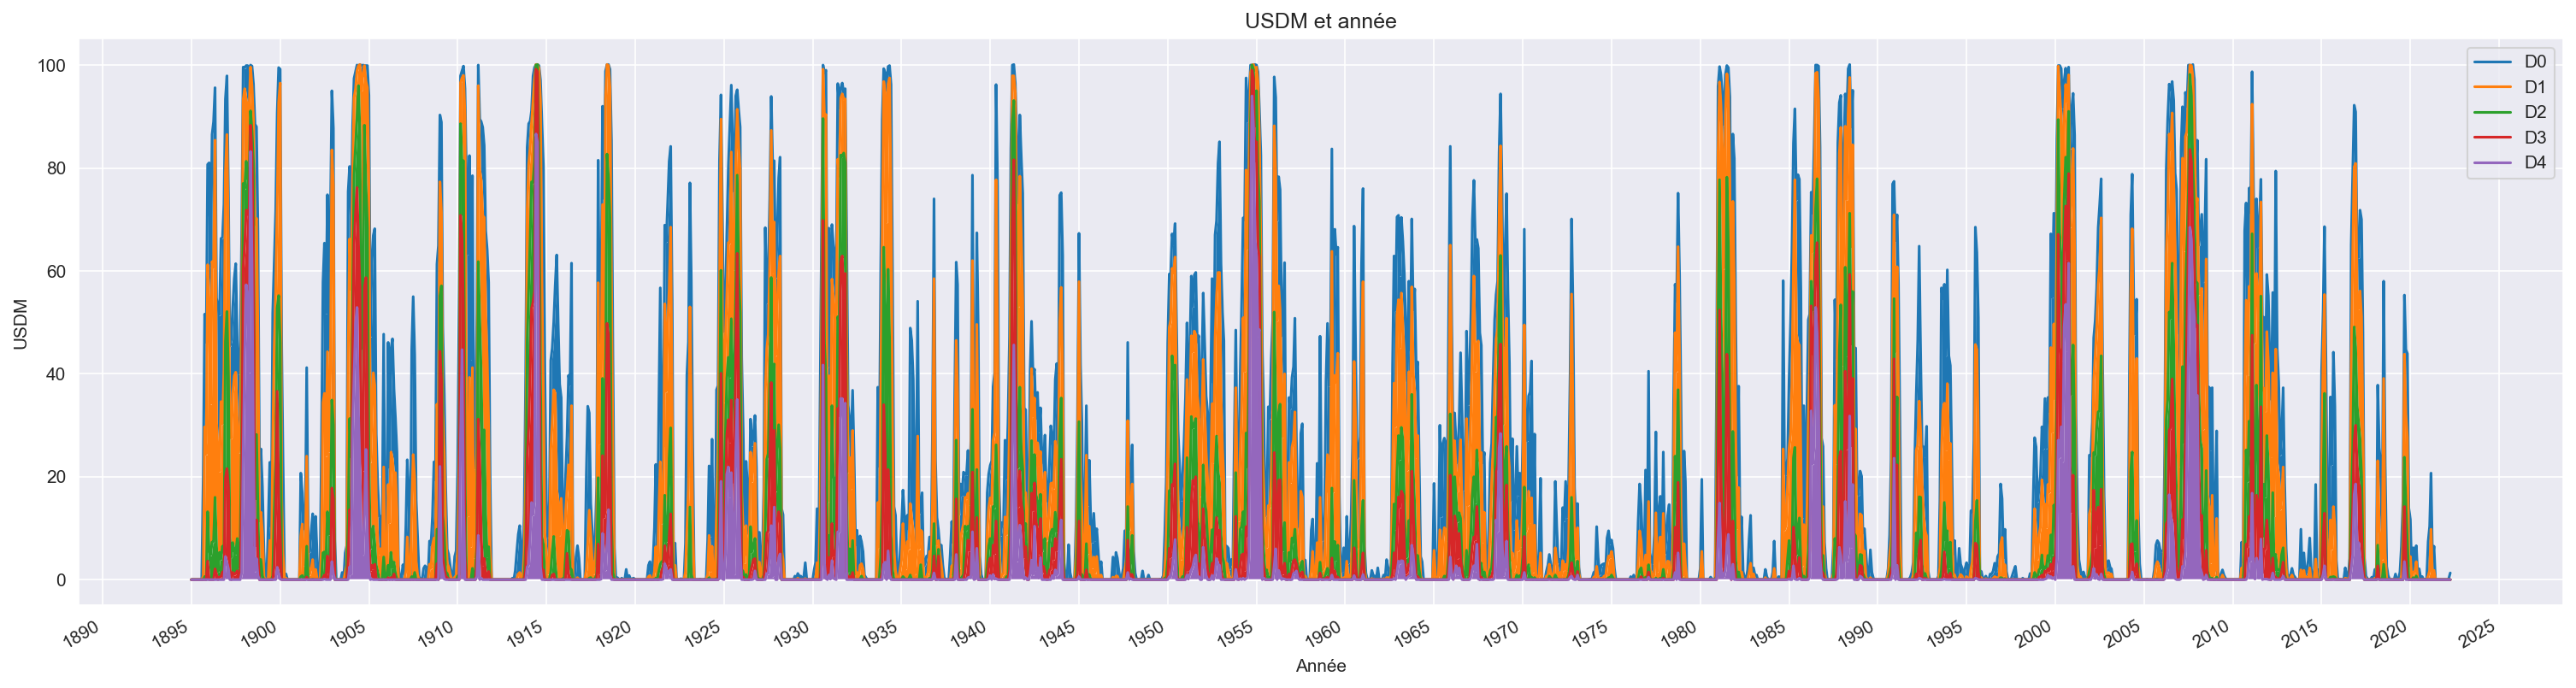

In [9]:
fig = plt.figure(figsize=(25, 6.5),dpi=150)
ax = fig.add_subplot(111)
ax.set_title('USDM et année')
ax.set_xlabel('Année')
ax.set_ylabel('USDM')
years = mdates.YearLocator(base=5)
x = data.DATE[data.state=='alabama']
y0 = data.D0[data.state=='alabama']
y1 = data.D1[data.state=='alabama']
y2 = data.D2[data.state=='alabama']
y3 = data.D3[data.state=='alabama']
y4 = data.D4[data.state=='alabama']
D0, = ax.plot(x,y0)
D1, = ax.plot(x,y1)
D2, = ax.plot(x,y2)
D3, = ax.plot(x,y3)
D4, = ax.plot(x,y4)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(years)
fig.autofmt_xdate()
ax.fill_between(x, 0, y0)
ax.fill_between(x, 0, y1)
ax.fill_between(x, 0, y2)
ax.fill_between(x, 0, y3)
ax.fill_between(x, 0, y4)
plt.legend(handles=[D0, D1, D2,D3,D4], labels=['D0', 'D1','D2','D3','D4'])

Il est difficile de visualiser directement toutes les données, nous allons donc d'abord examiner les données après 2000

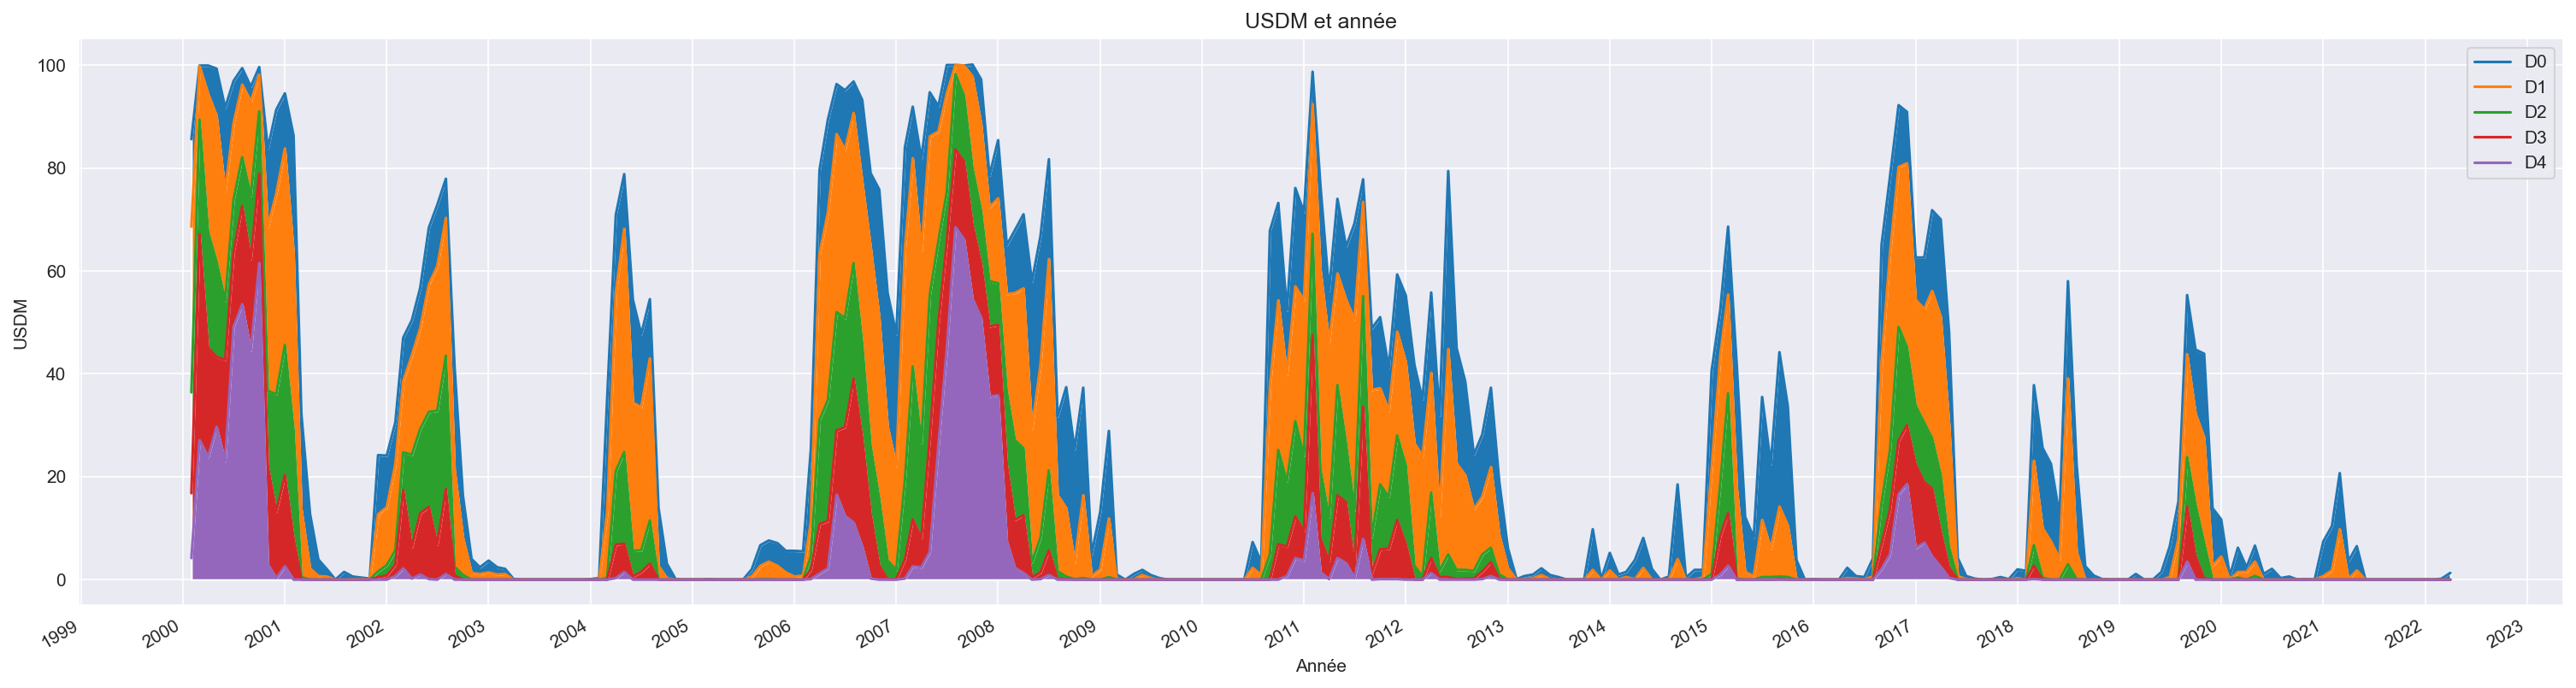

In [10]:
fig = plt.figure(figsize=(25, 6.5),dpi=150)
ax = fig.add_subplot(111)
ax.set_title('USDM et année')
ax.set_xlabel('Année')
ax.set_ylabel('USDM')
years = mdates.YearLocator(base=1)
x = data.DATE[(data.state=='alabama') & (data.DATE >'2000-01-01')]
y0 = data.D0[(data.state=='alabama') & (data.DATE >'2000-01-01')]
y1 = data.D1[(data.state=='alabama') & (data.DATE >'2000-01-01')]
y2 = data.D2[(data.state=='alabama') & (data.DATE >'2000-01-01')]
y3 = data.D3[(data.state=='alabama') & (data.DATE >'2000-01-01')]
y4 = data.D4[(data.state=='alabama') & (data.DATE >'2000-01-01')]
line0, = ax.plot(x,y0)
line1, = ax.plot(x,y1)
line2, = ax.plot(x,y2)
line3, = ax.plot(x,y3)
line4, = ax.plot(x,y4)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(years)
fig.autofmt_xdate()
ax.fill_between(x, 0, y0)
ax.fill_between(x, 0, y1)
ax.fill_between(x, 0, y2)
ax.fill_between(x, 0, y3)
ax.fill_between(x, 0, y4)
plt.legend(handles=[line0, line1, line2, line3, line4], labels=['D0', 'D1', 'D2', 'D3', 'D4'])

On peut voir qu'il n'est pas intuitif d'utiliser directement la taxonomie USDM car il existe plusieurs catégories, nous utilisons donc ici DSCI pour fusionner les données de plusieurs catégories ensemble

Text(0, 0.5, 'DSCI')

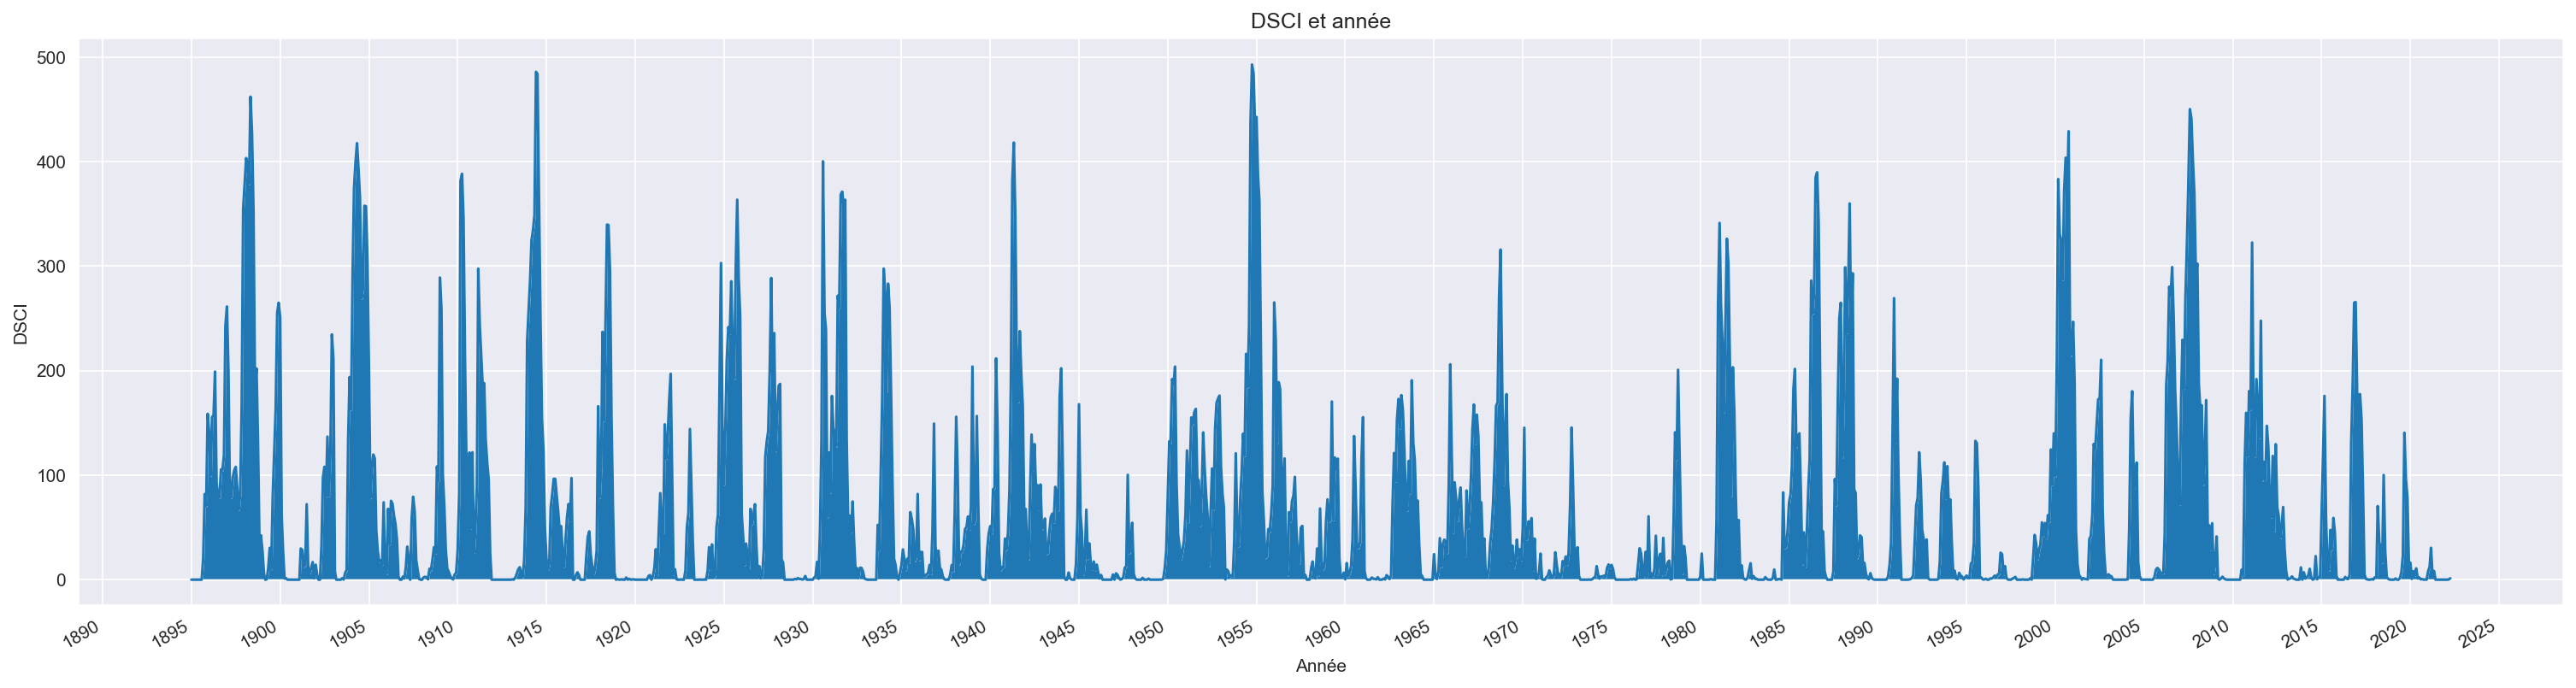

In [11]:
fig = plt.figure(figsize=(25, 6.5),dpi=150)
ax = fig.add_subplot(111)
years = mdates.YearLocator(base=5)
x = data.DATE[data.state=='alabama']
y = data.DSCI[data.state=='alabama']
ax.plot(x,y)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(years)
fig.autofmt_xdate()
ax.fill_between(x, 0, y)
ax.set_title('DSCI et année')
ax.set_xlabel('Année')
ax.set_ylabel('DSCI')

idem, nous nous concentrons d'abord sur les données après 2000

Text(0, 0.5, 'DSCI')

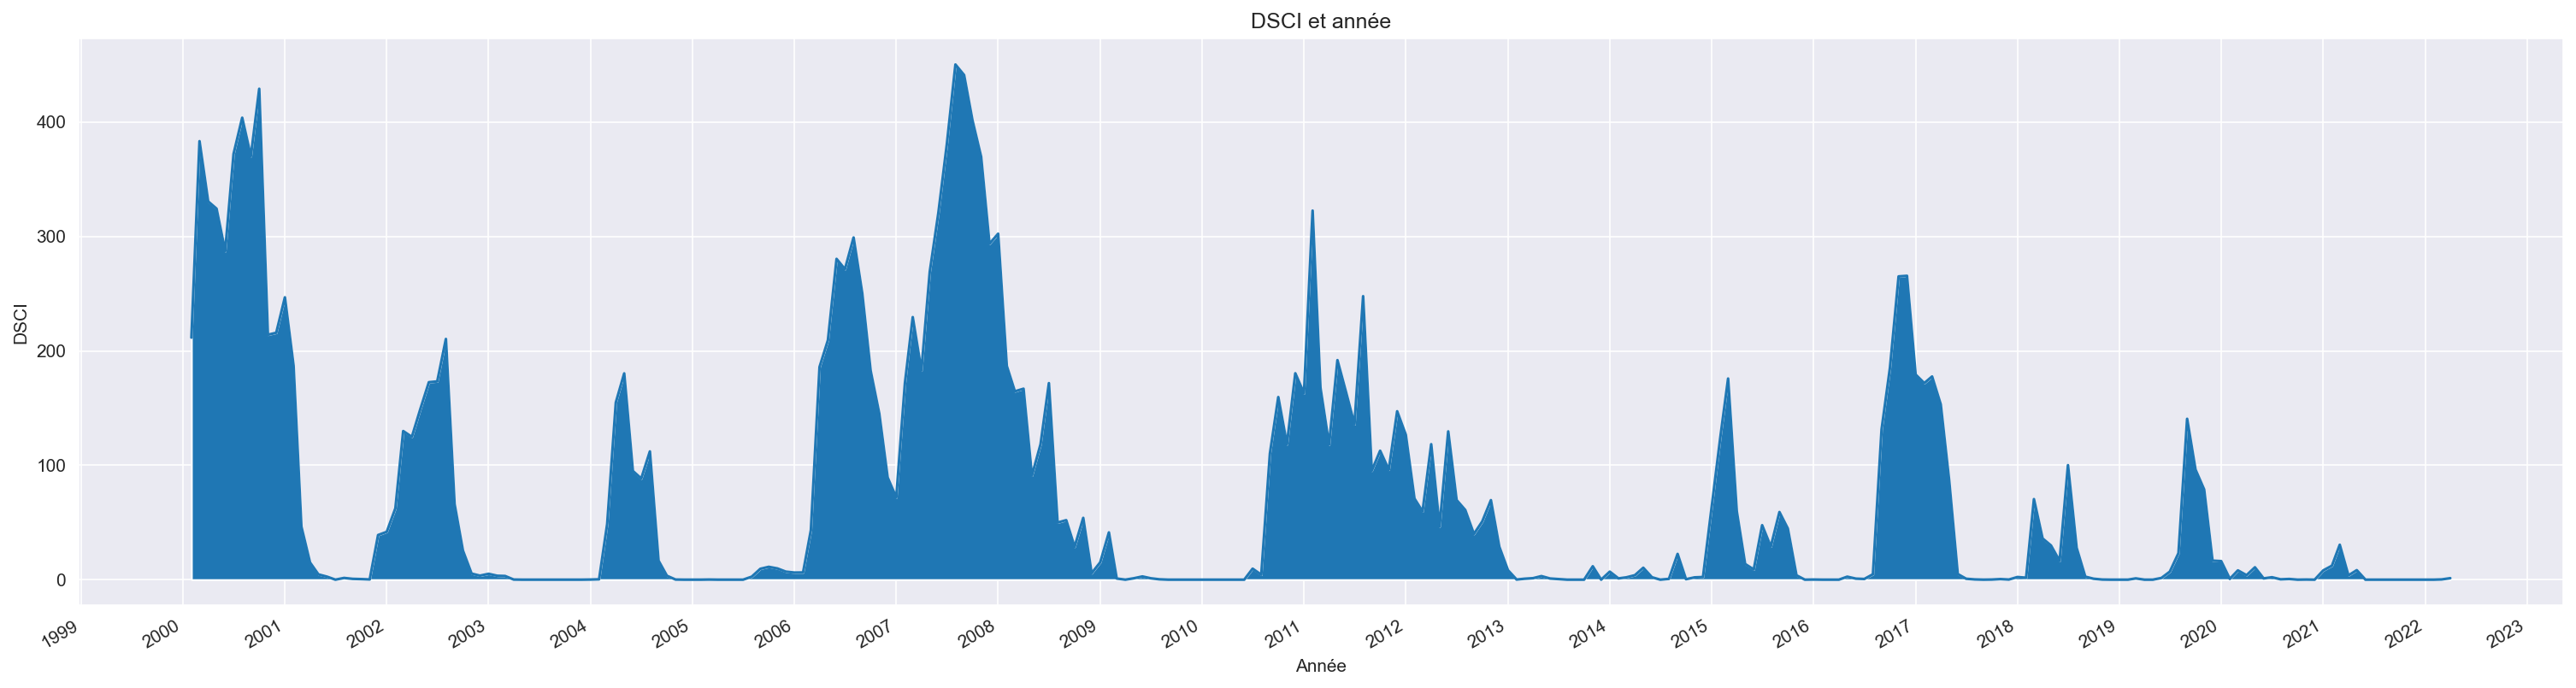

In [12]:
fig = plt.figure(figsize=(25, 6.5),dpi=150)
ax = fig.add_subplot(111)
years = mdates.YearLocator(base=1)
x = data.DATE[(data.state=='alabama') & (data.DATE >'2000-01-01')]
y = data.DSCI[(data.state=='alabama') & (data.DATE >'2000-01-01')]
ax.plot(x,y)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(years)
fig.autofmt_xdate()
ax.fill_between(x, 0, y)
ax.set_title('DSCI et année')
ax.set_xlabel('Année')
ax.set_ylabel('DSCI')

Ensuite, nous voulons comparer les données des états adjacents à l'état de l'alabama, ce sont les états mississippi et georgia.

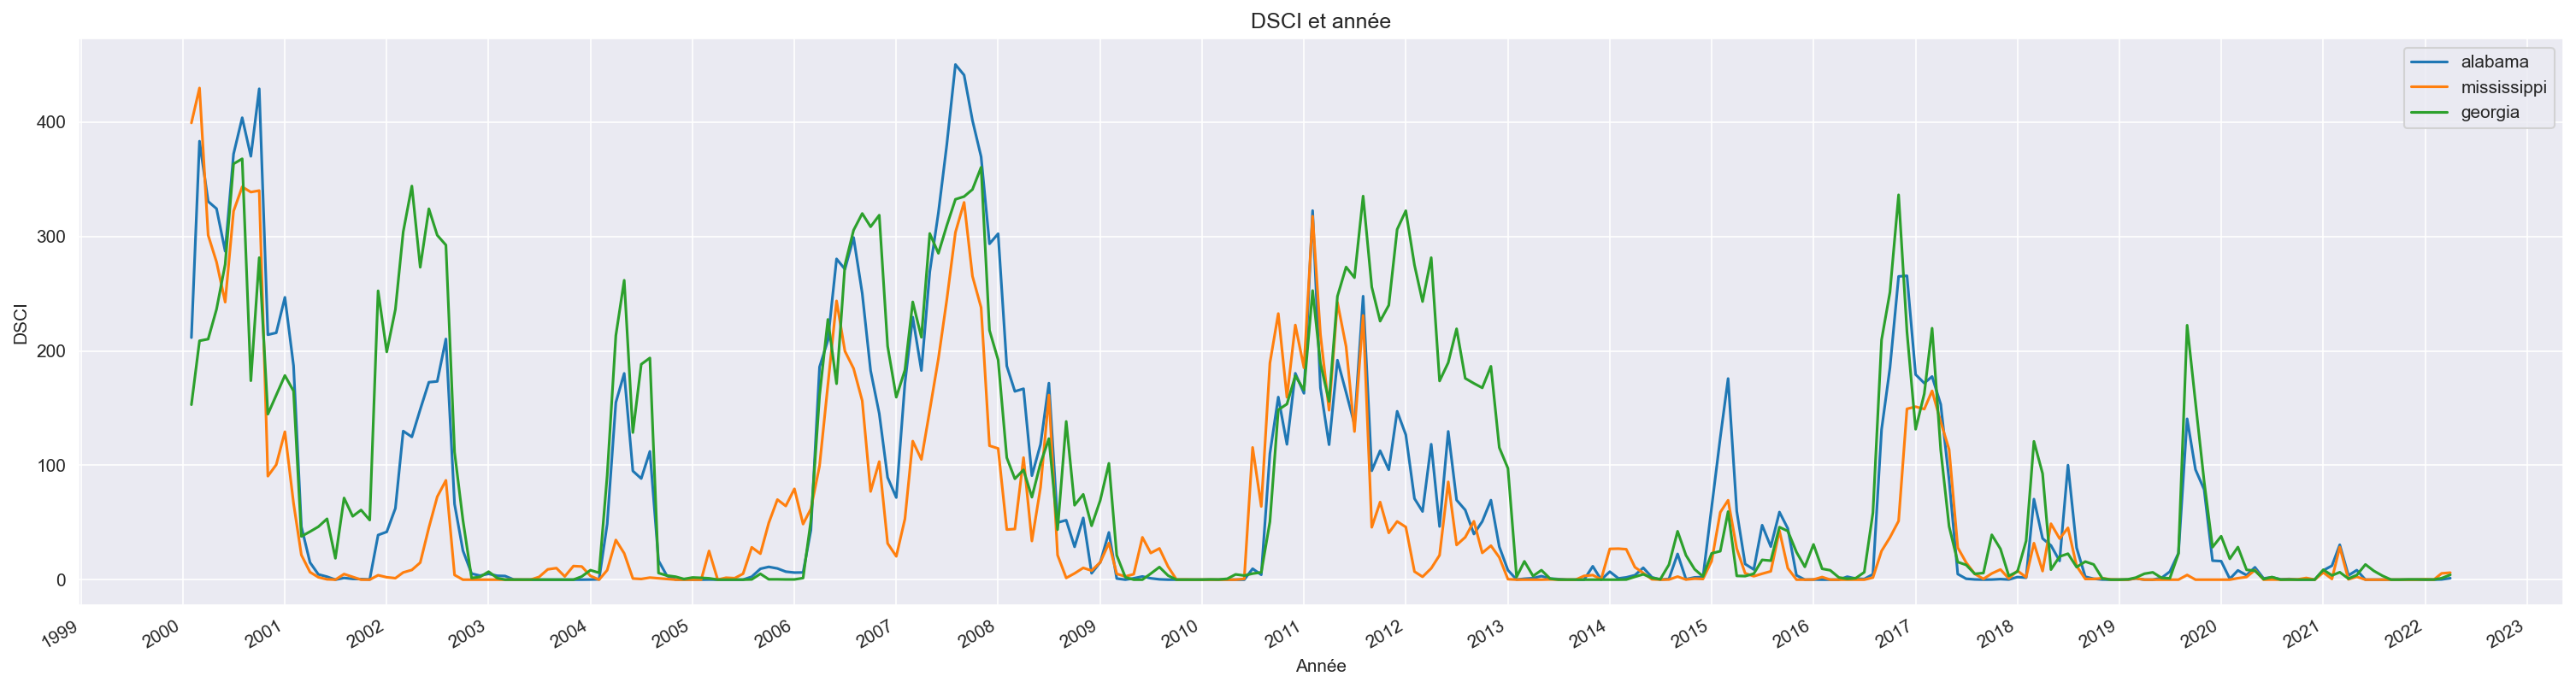

In [13]:
fig = plt.figure(figsize=(25, 6.5),dpi=150)
ax = fig.add_subplot(111)
years = mdates.YearLocator(base=1)
x = data.DATE[(data.state=='alabama') & (data.DATE >'2000-01-01')]
y0 = data.DSCI[(data.state=='alabama') & (data.DATE >'2000-01-01')]
y1 = data.DSCI[(data.state=='mississippi') & (data.DATE >'2000-01-01')]
y2 = data.DSCI[(data.state=='georgia') & (data.DATE >'2000-01-01')]
line0, = ax.plot(x,y0)
line1, = ax.plot(x,y1)
line2, = ax.plot(x,y2)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(years)
fig.autofmt_xdate()
# ax.fill_between(x, 0, y)
ax.set_title('DSCI et année')
ax.set_xlabel('Année')
ax.set_ylabel('DSCI')
plt.legend(handles=[line0, line1, line2], labels=['alabama', 'mississippi', 'georgia'])

Comme on peut le voir, les niveaux et les tendances de la sécheresse dans les États voisins sont très similaires, peut-être qu'on peut utiliser la méthode de cluster pour classifier les données à différent class.

Pour vérifier notre idée, on va comparer les états qui ne sont pas voisins, et identifier si les tendances sont similaires.

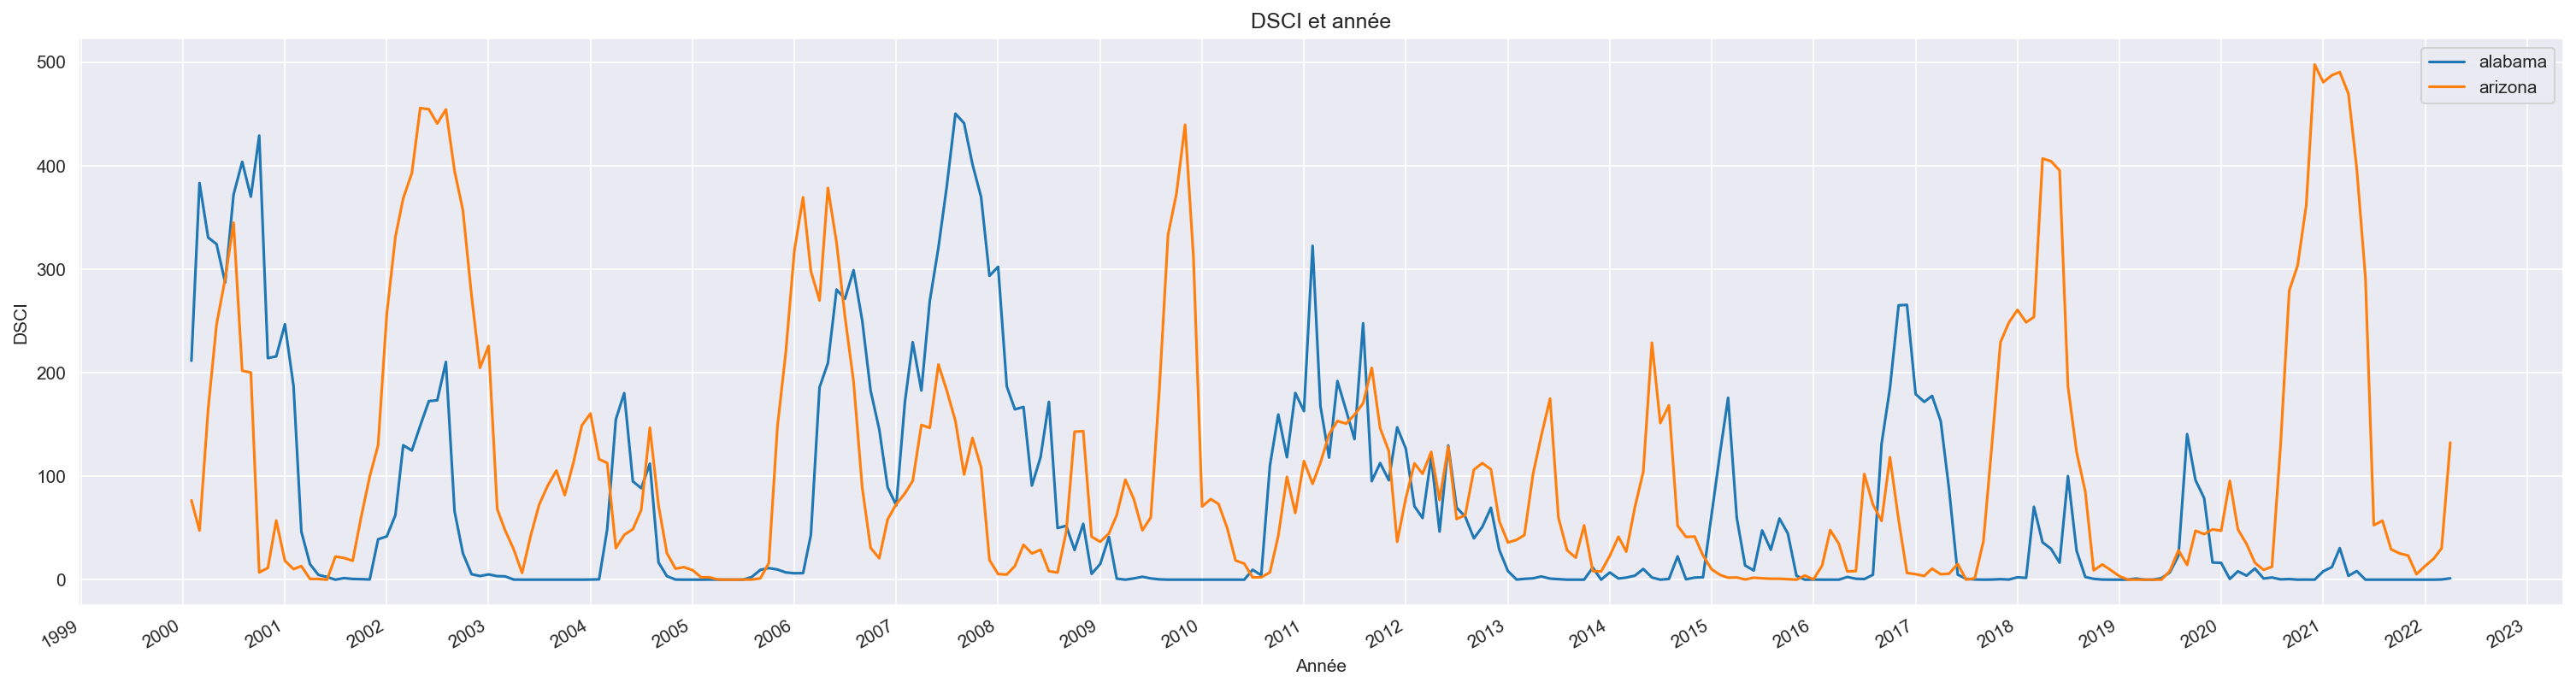

In [14]:
fig = plt.figure(figsize=(25, 6.5),dpi=150)
ax = fig.add_subplot(111)
years = mdates.YearLocator(base=1)
x = data.DATE[(data.state=='alabama') & (data.DATE >'2000-01-01')]
y0 = data.DSCI[(data.state=='alabama') & (data.DATE >'2000-01-01')]
y1 = data.DSCI[(data.state=='arizona') & (data.DATE >'2000-01-01')]

line0, = ax.plot(x,y0)
line1, = ax.plot(x,y1)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(years)
fig.autofmt_xdate()
# ax.fill_between(x, 0, y)
ax.set_title('DSCI et année')
ax.set_xlabel('Année')
ax.set_ylabel('DSCI')
plt.legend(handles=[line0, line1], labels=['alabama', 'arizona'])

On peut regarder les états pas voisins n'avons pas les tendances similaires, les sommets de sécheresse sont différents.
Mais dans certaines années, comme 2002 à 2003, ils ont le même tendance, ça peut être il y a une sécheresse nationale dans cette période.